<a href="https://colab.research.google.com/github/lizmtetwa/Data-Analytics-Portfolio-/blob/main/Copy_of_regionalsalesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
REGIONAL SALES DATASET

**Regional Sales Analysis **

**Introduction**

This project analyses sales data across different regions to uncover trends, compare perfomance and generate actionable business insights.

The main objectives are:-


*   to identify top-perfoming regions and underperforming regions.


*   to visualise sales trends over time and across product categories.


*   to provide recommendations for improving sales and regional strategies
 The dataset includes information on sales product categories, regions and other relevantant metrics.  By exploring and visualising this data we aim to help decision-makers optimise sales strategies and focus resources effectively.






# New section

In [ ]:
from google.colab import files
import pandas as pd

#upload file
uploaded = files.upload()

#get the file name (the first iploaded file)
file_name = list(uploaded.keys())[0]

#load the dataset into a dataframe
if file_name.endswith('csv'):
  df=pd.read_csv(file_name)
elif file_name.endswith('.xlsx'):
  df = pd.read_excel(file_name)
else:
  print('unsupported file type')

  #show first 5 rows
  display(df.head())

Saving supermarket analysis portfolio.csv to supermarket analysis portfolio.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Displaying Summary statistics**:
Calculate and display summary statistics for all numerical columns in the DataFrame `df` using the `.describe()` method.



In [ ]:
display(df.describe())

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
print("Converted 'Date' to datetime and created 'Timestamp' column.")
display(df[['Date', 'Time', 'Timestamp']].head())

Converted 'Date' to datetime and created 'Timestamp' column.


,Date,Time,Timestamp
0,2019-01-05,13:08,2019-01-05 13:08:00
1,2019-03-08,10:29,2019-03-08 10:29:00
2,2019-03-03,13:23,2019-03-03 13:23:00
3,2019-01-27,20:33,2019-01-27 20:33:00
4,2019-02-08,10:37,2019-02-08 10:37:00


In [ ]:
sales_over_time = df.groupby('Timestamp')['Total'].sum()
print("Total sales calculated over time:")
display(sales_over_time.head())

Total sales calculated over time:


,Total
Timestamp,
2019-01-01 10:39:00,457.443
2019-01-01 11:36:00,888.615
2019-01-01 11:40:00,184.086
2019-01-01 11:43:00,132.027
2019-01-01 13:55:00,621.243


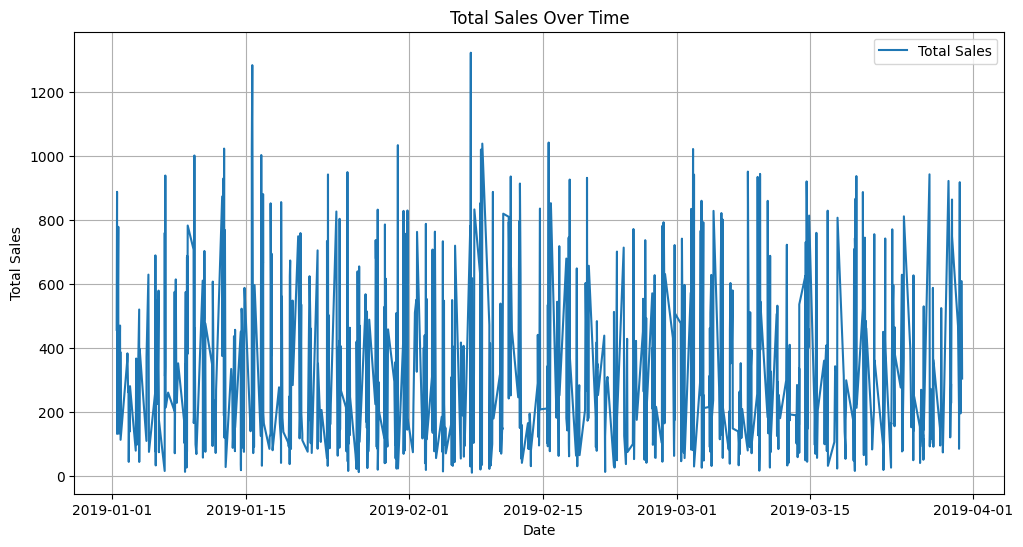

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values, label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


**ANALYSING SALES BY PRODUCT LINE**:
To analyze total sales by product line, I will group the DataFrame by 'Product line' and sum the 'Total' sales. Then, I will create a bar plot to visualize these sales, ensuring it includes a title, axis labels, and a legend for clarity.



/tmp/ipython-input-1185328491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values, palette='viridis')


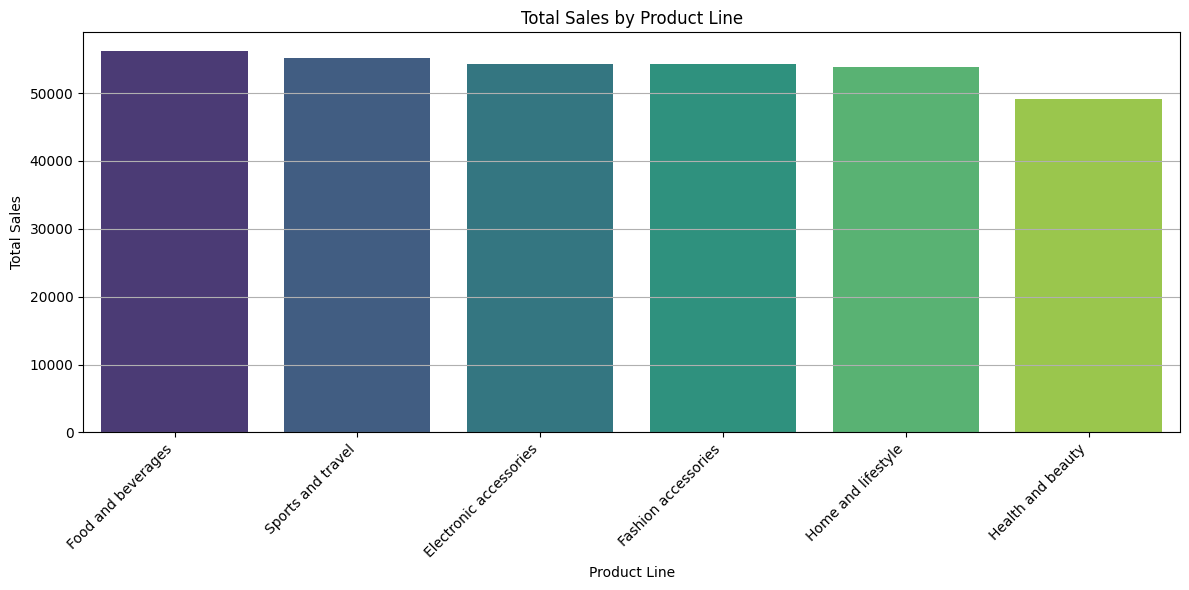

Total sales by product line calculated and visualized.


,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130


In [ ]:
sales_by_product_line = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by product line calculated and visualized.")
display(sales_by_product_line.head())

/tmp/ipython-input-2592999117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='plasma')


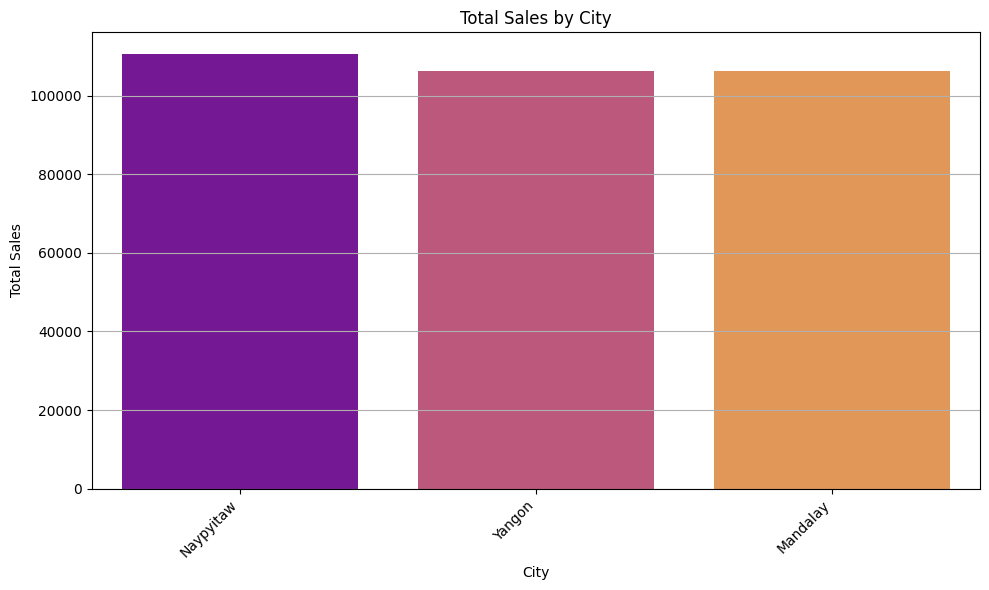

Total sales by city calculated and visualized.


,Total
City,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


In [ ]:
sales_by_city = df.groupby('City')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='plasma')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by city calculated and visualized.")
display(sales_by_city.head())

**TOTAL SALES BY CUSTOMER **:
To understand the sales contribution of different customer segments, I will group the DataFrame by 'Customer type', sum the 'Total' sales, and then visualize these aggregated sales using a bar plot.



/tmp/ipython-input-2643952328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, palette='coolwarm')


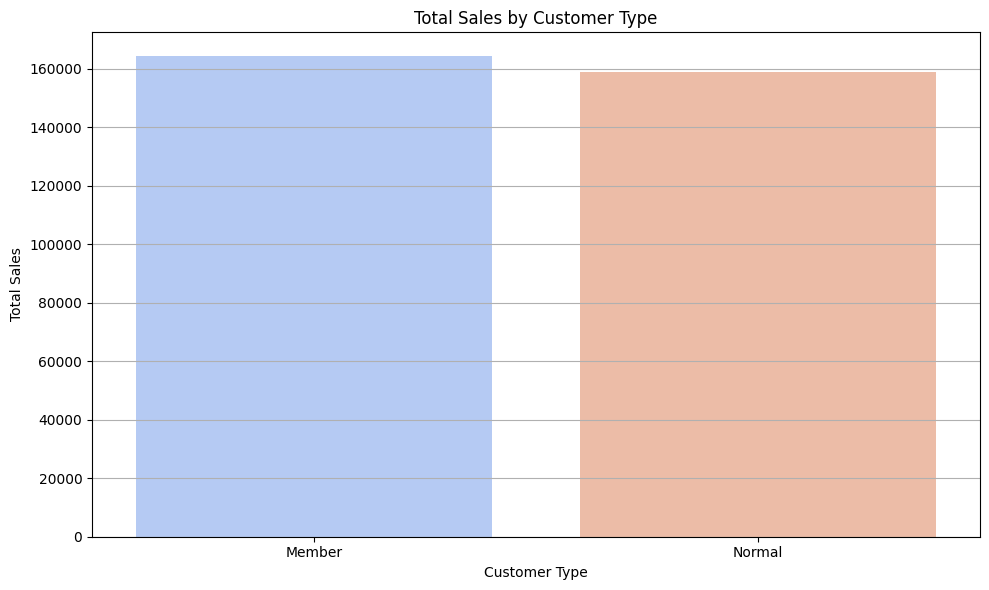

Total sales by customer type calculated and visualized.


,Total
Customer type,
Member,164223.444
Normal,158743.305


In [ ]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, palette='coolwarm')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by customer type calculated and visualized.")
display(sales_by_customer_type.head())

/tmp/ipython-input-1259337188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='coolwarm')


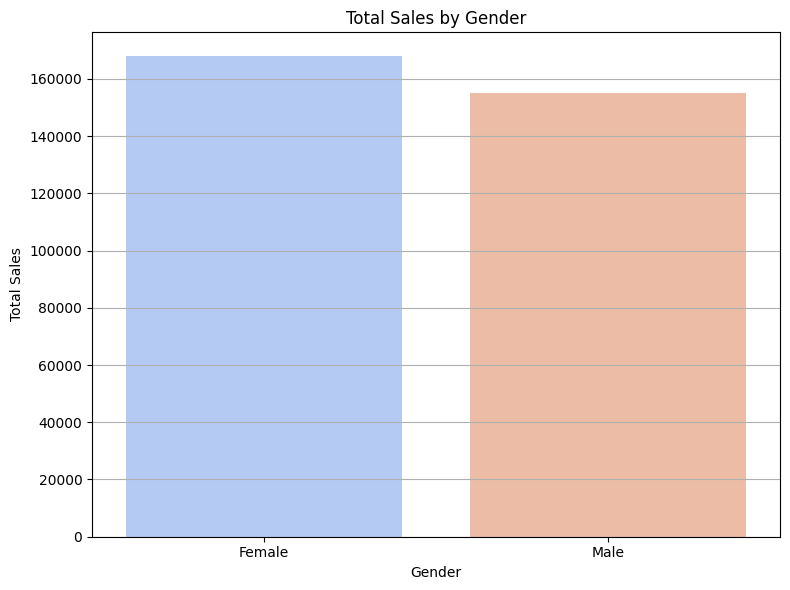

Total sales by gender calculated and visualized.


,Total
Gender,
Female,167882.925
Male,155083.824


In [ ]:
sales_by_gender = df.groupby('Gender')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='coolwarm')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by gender calculated and visualized.")
display(sales_by_gender.head())

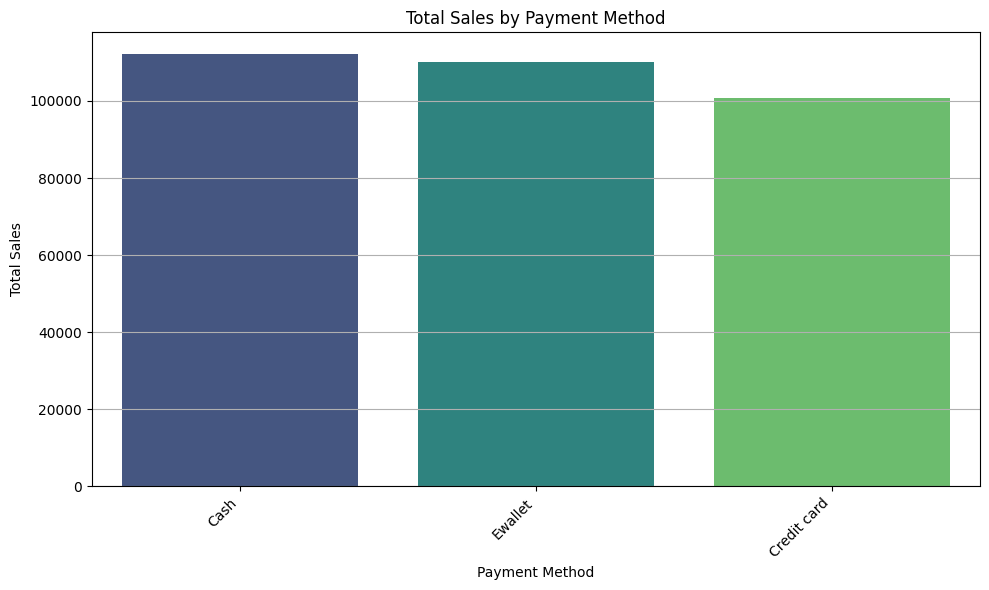

Total sales by payment method calculated and visualized.


,Total
Payment,
Cash,112206.570
Ewallet,109993.107
Credit card,100767.072


In [ ]:
sales_by_payment = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, hue=sales_by_payment.index, palette='viridis', legend=False)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by payment method calculated and visualized.")
display(sales_by_payment.head())

In [ ]:
df['Date_only'] = df['Timestamp'].dt.date
sales_by_city_over_time = df.groupby(['Date_only', 'City'])['Total'].sum().reset_index()
print("Aggregated sales by city and date:")
display(sales_by_city_over_time.head())

Aggregated sales by city and date:


,Date_only,City,Total
0,2019-01-01,Mandalay,1536.6960
1,2019-01-01,Naypyitaw,837.1650
2,2019-01-01,Yangon,2371.3200
3,2019-01-02,Mandalay,1162.8015
4,2019-01-02,Naypyitaw,475.6500


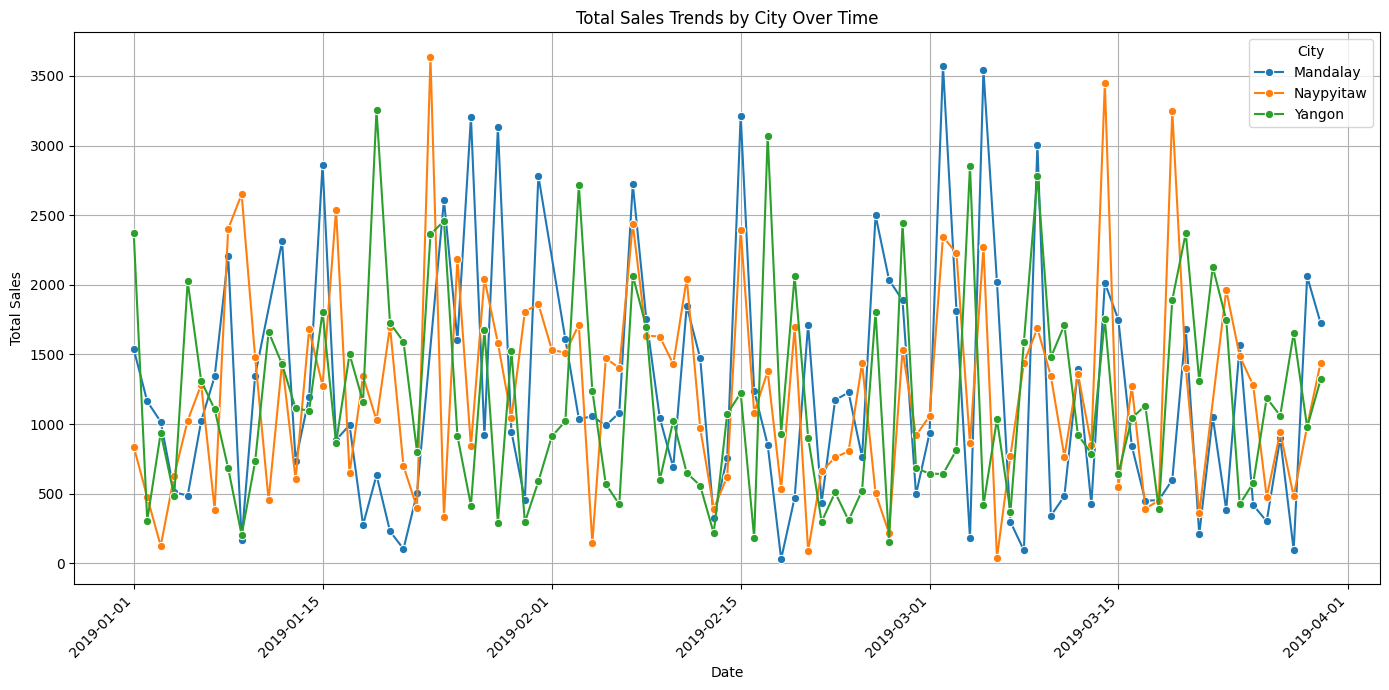

Visualized total sales trends by city over time.


In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_city_over_time, x='Date_only', y='Total', hue='City', marker='o')
plt.title('Total Sales Trends by City Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualized total sales trends by city over time.")

In [ ]:
sales_by_city_product = df.groupby(['City', 'Product line'])['Total'].sum().reset_index()
print("Aggregated sales by city and product line:")
display(sales_by_city_product.head())

Aggregated sales by city and product line:


,City,Product line,Total
0,Mandalay,Electronic accessories,17051.4435
1,Mandalay,Fashion accessories,16413.3165
2,Mandalay,Food and beverages,15214.8885
3,Mandalay,Health and beauty,19980.6600
4,Mandalay,Home and lifestyle,17549.1645


/tmp/ipython-input-2247391443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=city_data, palette='viridis')
/tmp/ipython-input-2247391443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=city_data, palette='viridis')
/tmp/ipython-input-2247391443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=city_data, palette='viridis')


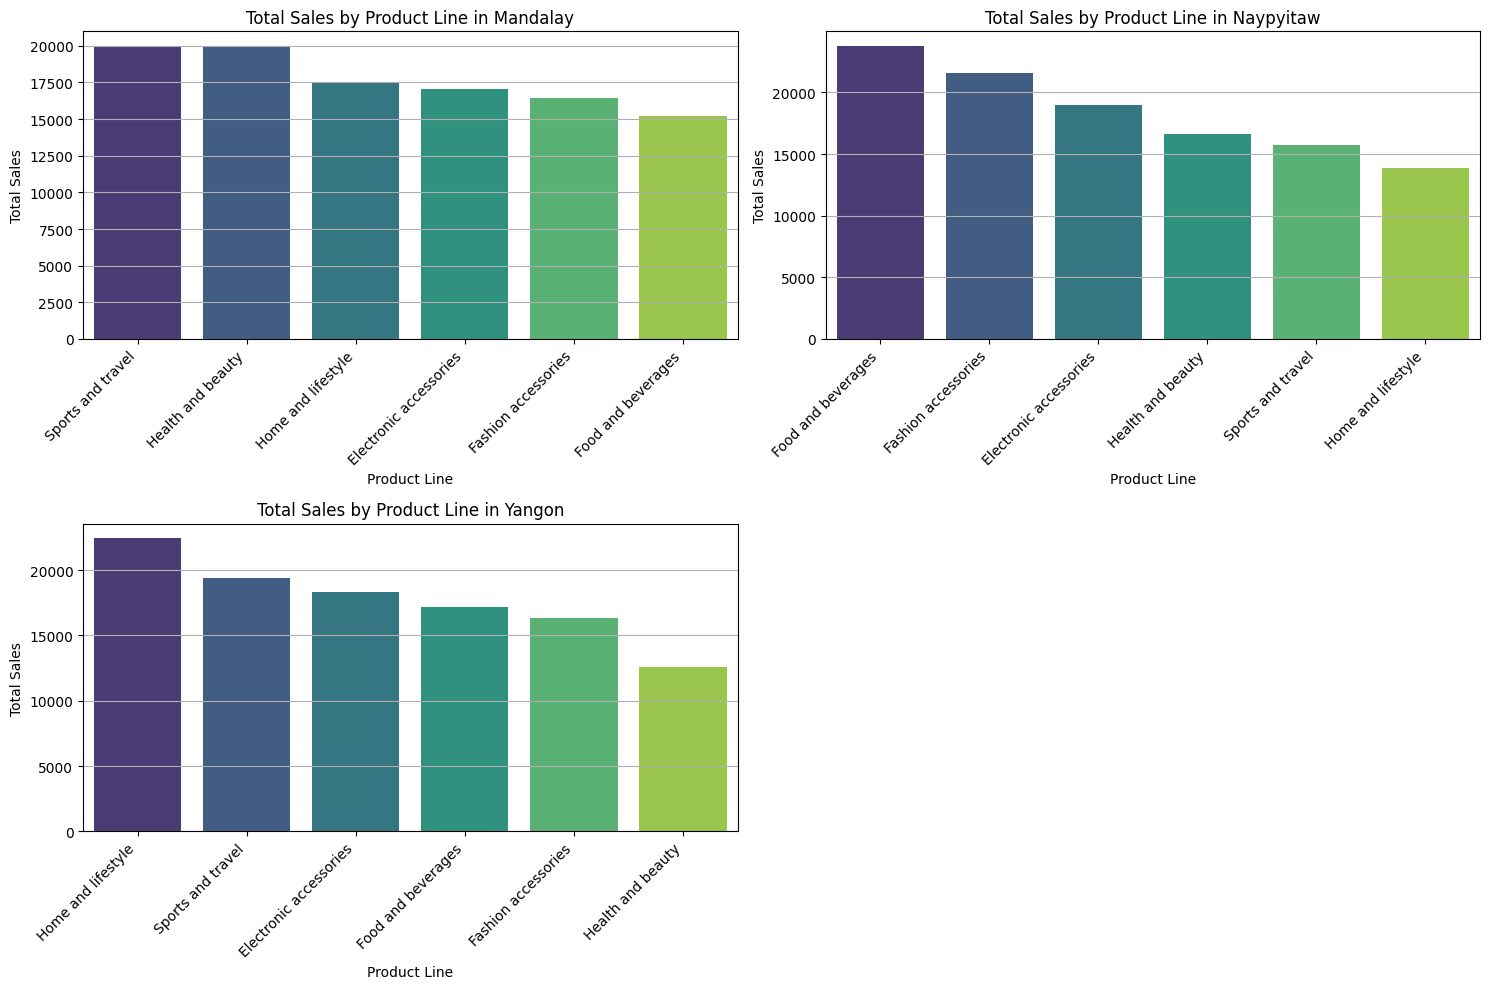

Visualized top products by region.


In [ ]:
unique_cities = sales_by_city_product['City'].unique()

plt.figure(figsize=(15, 10))
for i, city in enumerate(unique_cities):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    city_data = sales_by_city_product[sales_by_city_product['City'] == city].sort_values(by='Total', ascending=False)
    sns.barplot(x='Product line', y='Total', data=city_data, palette='viridis')
    plt.title(f'Total Sales by Product Line in {city}')
    plt.xlabel('Product Line')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Visualized top products by region.")

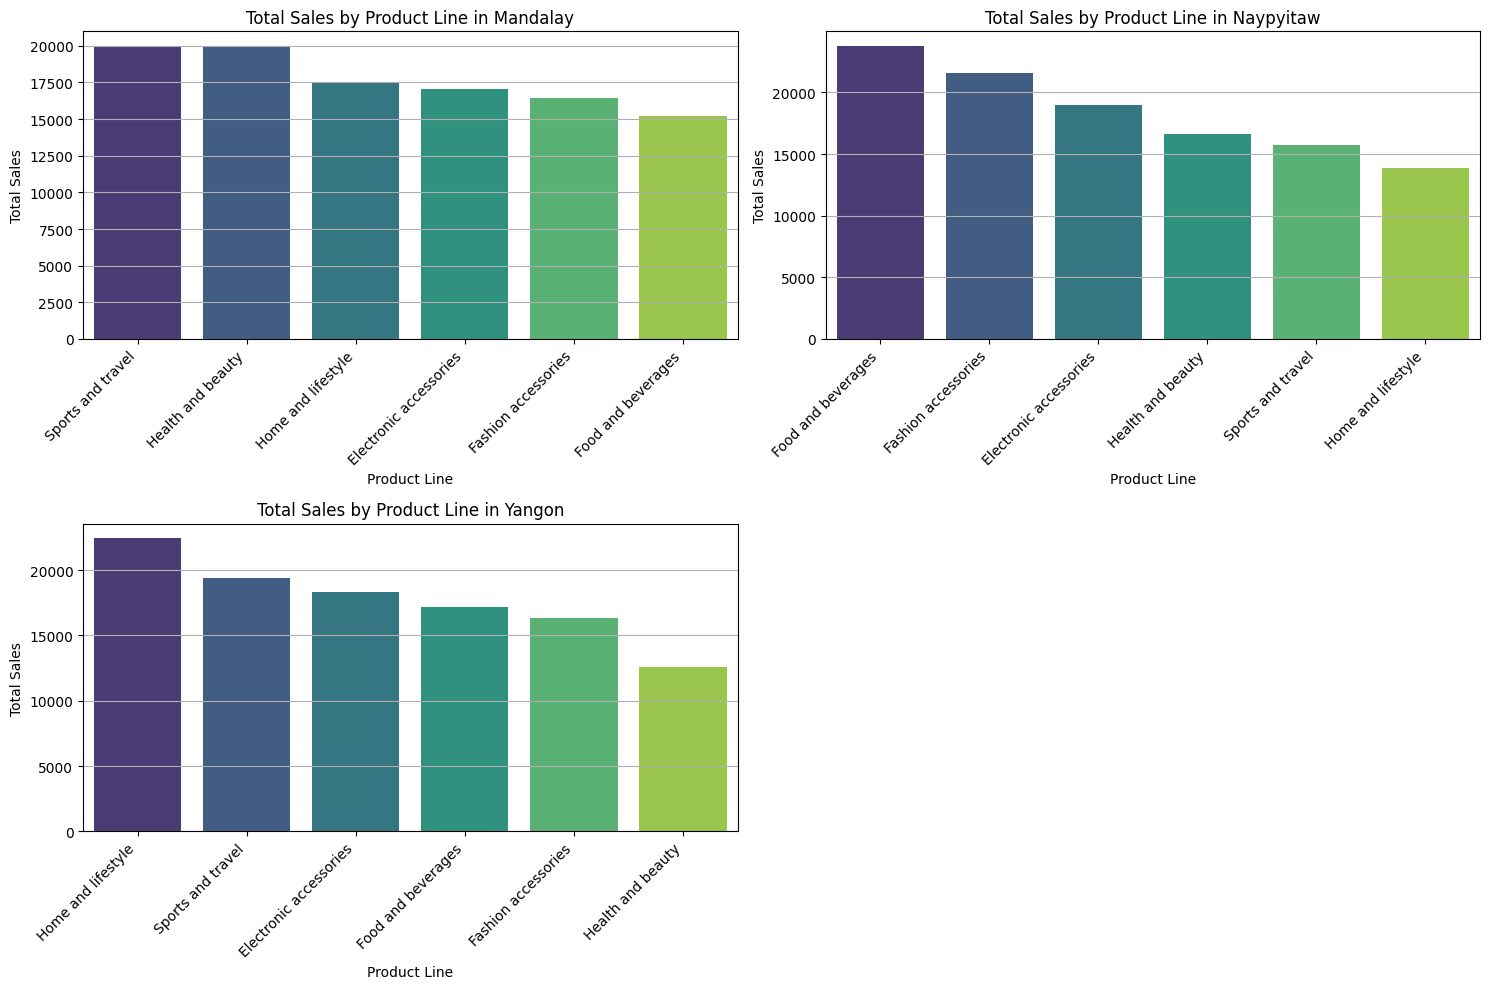

Visualized top products by region.


In [ ]:
unique_cities = sales_by_city_product['City'].unique()

plt.figure(figsize=(15, 10))
for i, city in enumerate(unique_cities):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    city_data = sales_by_city_product[sales_by_city_product['City'] == city].sort_values(by='Total', ascending=False)
    sns.barplot(x='Product line', y='Total', data=city_data, hue='Product line', palette='viridis', legend=False)
    plt.title(f'Total Sales by Product Line in {city}')
    plt.xlabel('Product Line')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Visualized top products by region.")

In [ ]:
sales_per_transaction = df.groupby(['City', 'Invoice ID'])['Total'].sum().reset_index()
average_basket_size_per_city = sales_per_transaction.groupby('City')['Total'].mean().sort_values(ascending=False)

print("Average basket size per city calculated:")
display(average_basket_size_per_city.head())

Average basket size per city calculated:


,Total
City,
Naypyitaw,337.099715
Mandalay,319.872506
Yangon,312.354031


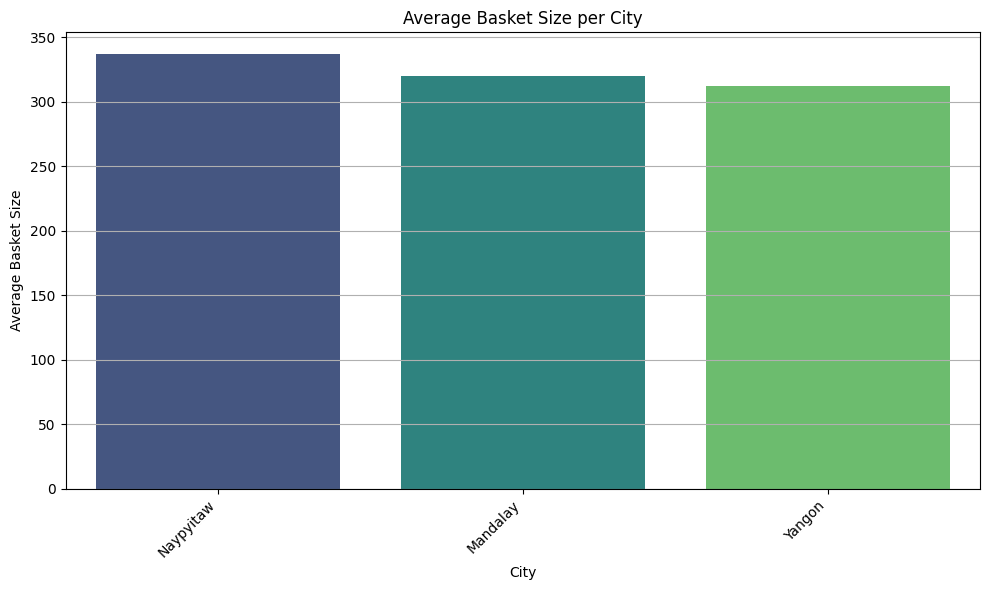

Visualized average basket size per city.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_basket_size_per_city.index, y=average_basket_size_per_city.values, hue=average_basket_size_per_city.index, palette='viridis', legend=False)
plt.title('Average Basket Size per City')
plt.xlabel('City')
plt.ylabel('Average Basket Size')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Visualized average basket size per city.")

In [ ]:
df['Month'] = df['Timestamp'].dt.month
print("Extracted 'Month' from 'Timestamp' column.")
display(df[['Timestamp', 'Month']].head())

Extracted 'Month' from 'Timestamp' column.


,Timestamp,Month
0,2019-01-05 13:08:00,1
1,2019-03-08 10:29:00,3
2,2019-03-03 13:23:00,3
3,2019-01-27 20:33:00,1
4,2019-02-08 10:37:00,2


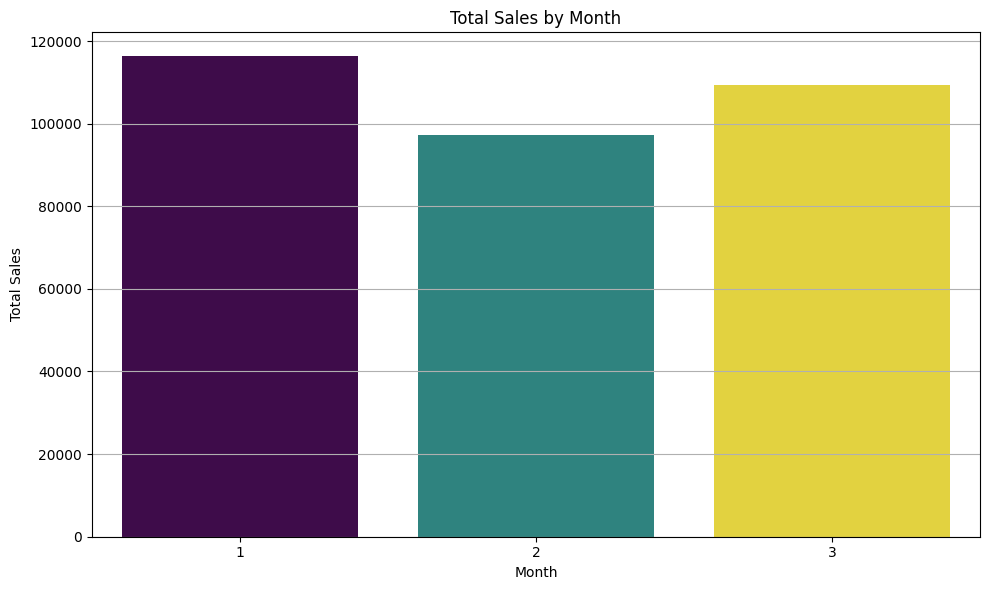

Total sales by month calculated and visualized.


,Month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


In [ ]:
sales_by_month = df.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total', data=sales_by_month, hue='Month', palette='viridis', legend=False)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by month calculated and visualized.")
display(sales_by_month.head())

In [ ]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
print("Extracted 'DayOfWeek' from 'Timestamp' column.")
display(df[['Timestamp', 'DayOfWeek']].head())

Extracted 'DayOfWeek' from 'Timestamp' column.


,Timestamp,DayOfWeek
0,2019-01-05 13:08:00,Saturday
1,2019-03-08 10:29:00,Friday
2,2019-03-03 13:23:00,Sunday
3,2019-01-27 20:33:00,Sunday
4,2019-02-08 10:37:00,Friday


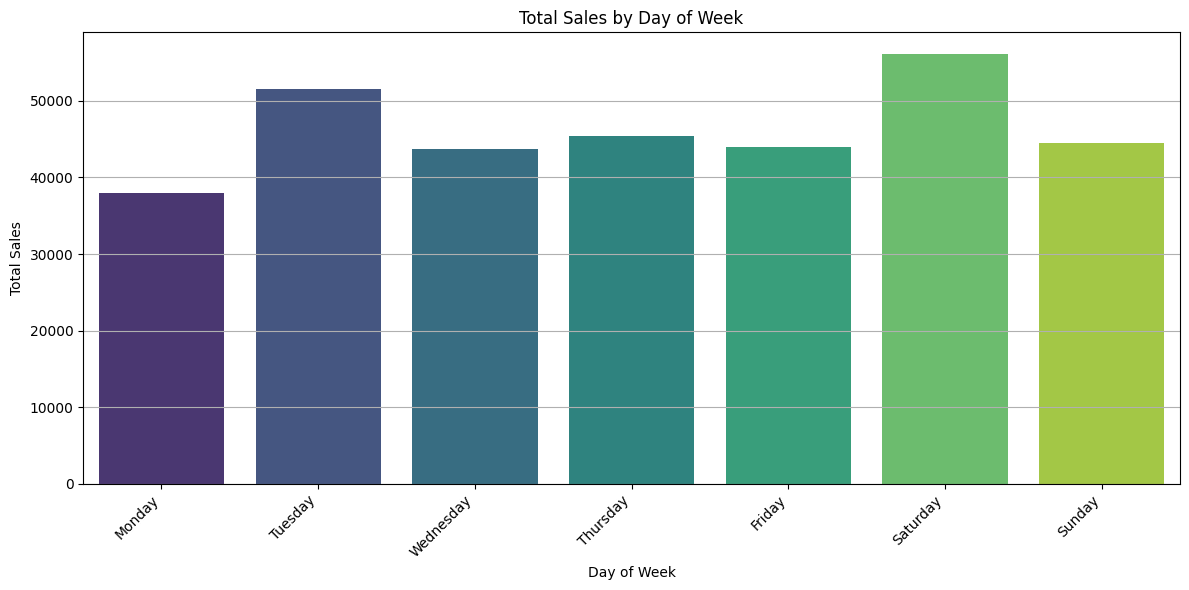

Total sales by day of week calculated and visualized.


,DayOfWeek,Total
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405


In [ ]:
sales_by_dayofweek = df.groupby('DayOfWeek')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Total', data=sales_by_dayofweek, hue='DayOfWeek', palette='viridis', legend=False)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Total sales by day of week calculated and visualized.")
display(sales_by_dayofweek.head())

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])
print("Identified numerical columns:")
display(numerical_cols.head())
print(f"Number of numerical columns: {len(numerical_cols.columns)}")
print("List of numerical column names:")
print(numerical_cols.columns.tolist())

Identified numerical columns:


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,3
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,3
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,2


Number of numerical columns: 9
List of numerical column names:
['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Month']


In [ ]:
correlation_matrix = numerical_cols.corr(method='pearson')
print("Calculated Pearson correlation matrix:")
display(correlation_matrix)

Calculated Pearson correlation matrix:


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.027387
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.014524
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.042880
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,1.000000


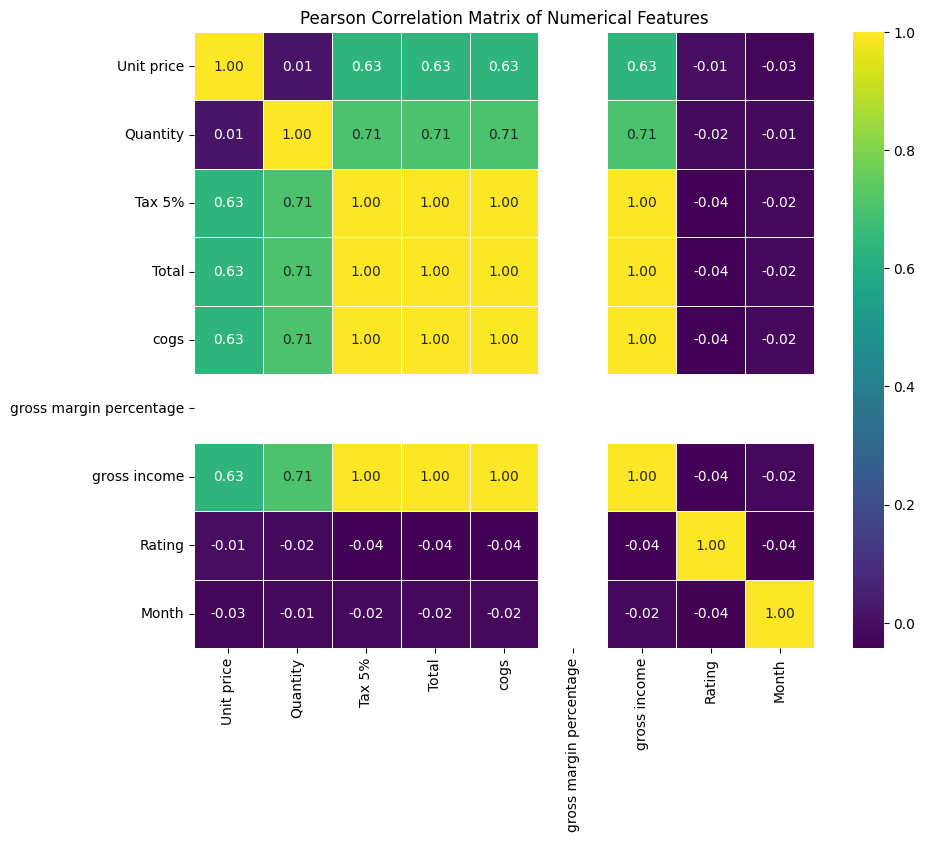

Visualized the correlation matrix as a heatmap.


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

print("Visualized the correlation matrix as a heatmap.")

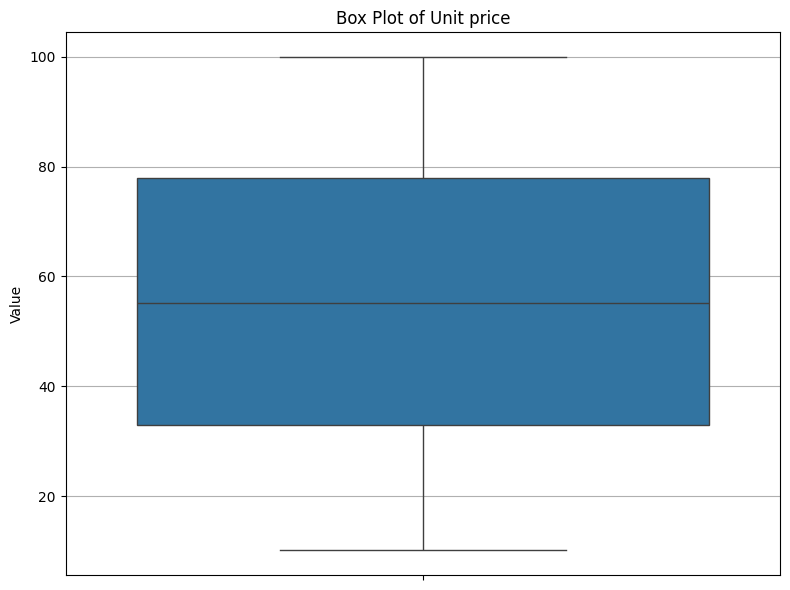

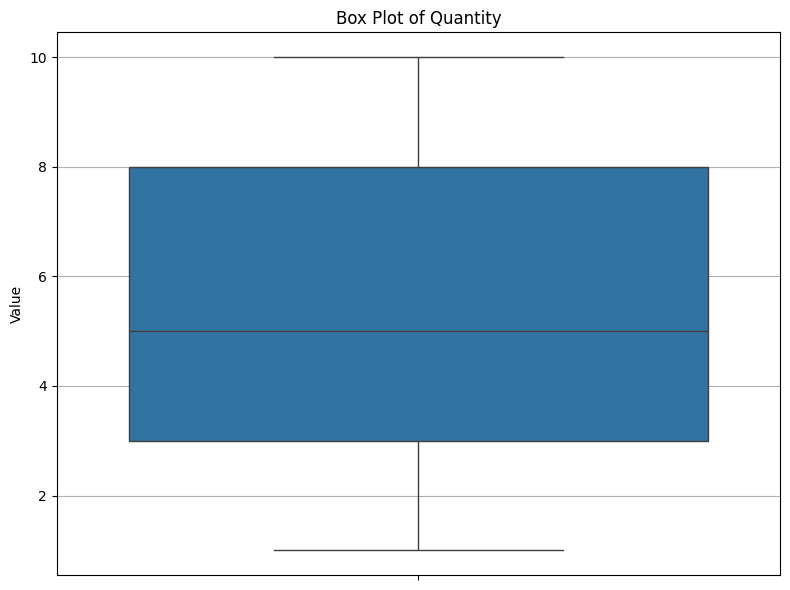

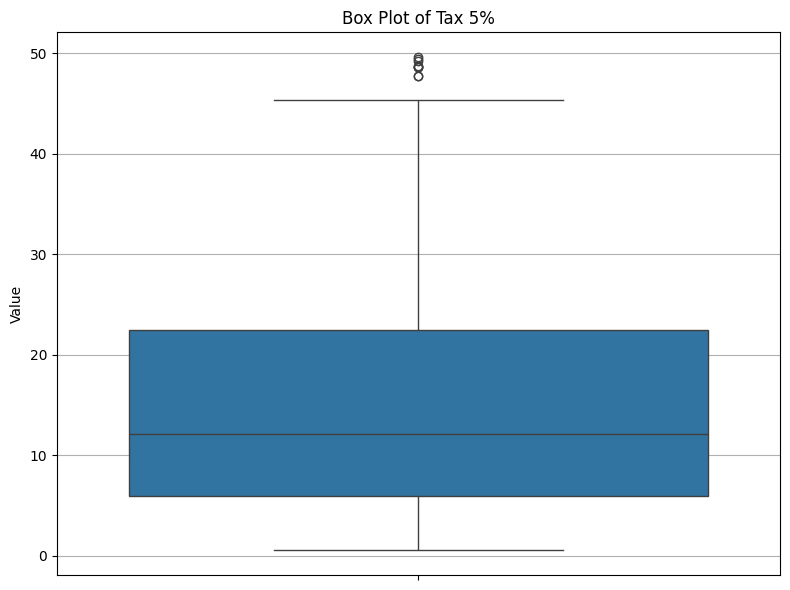

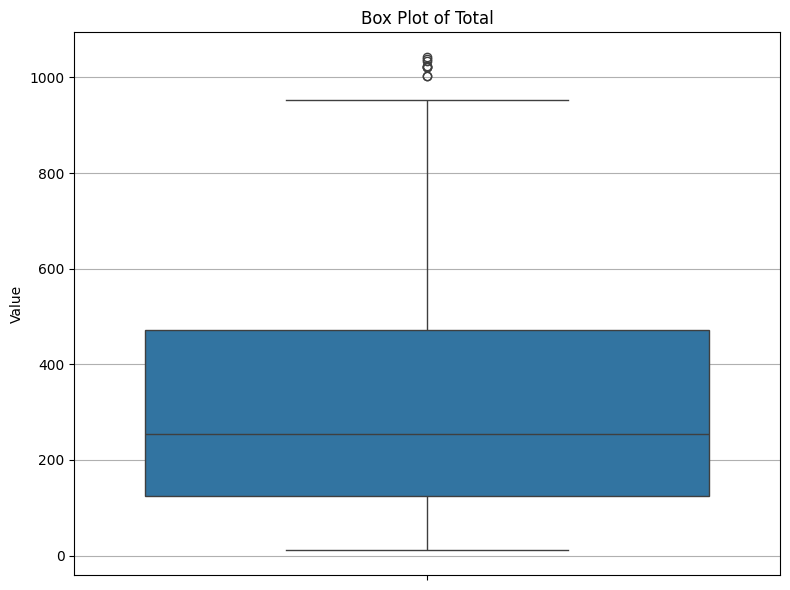

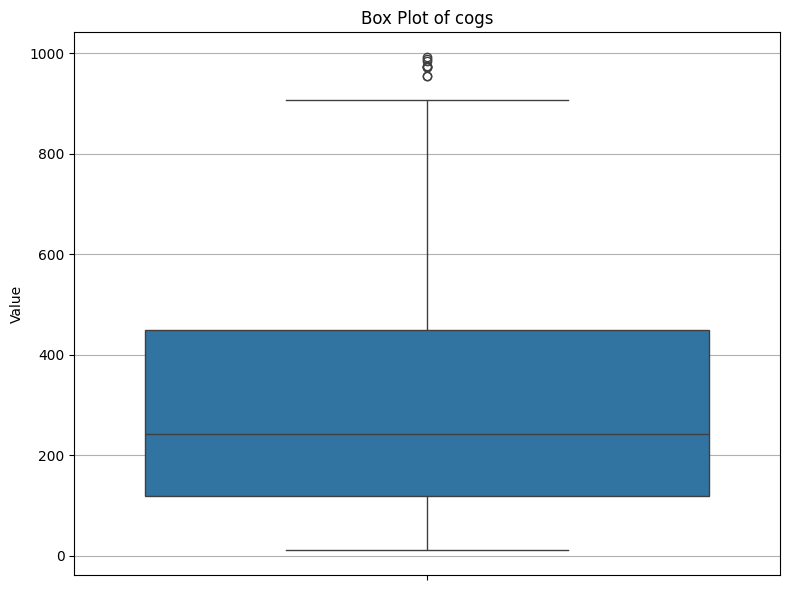

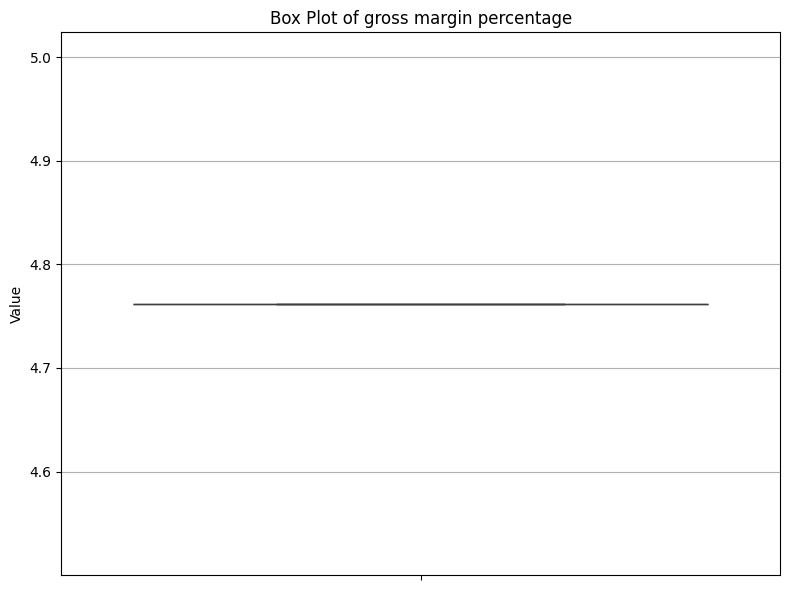

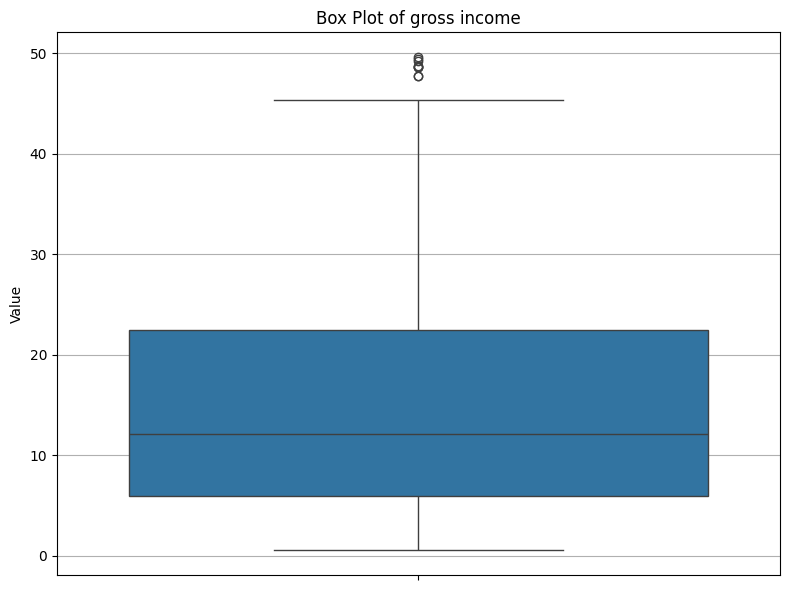

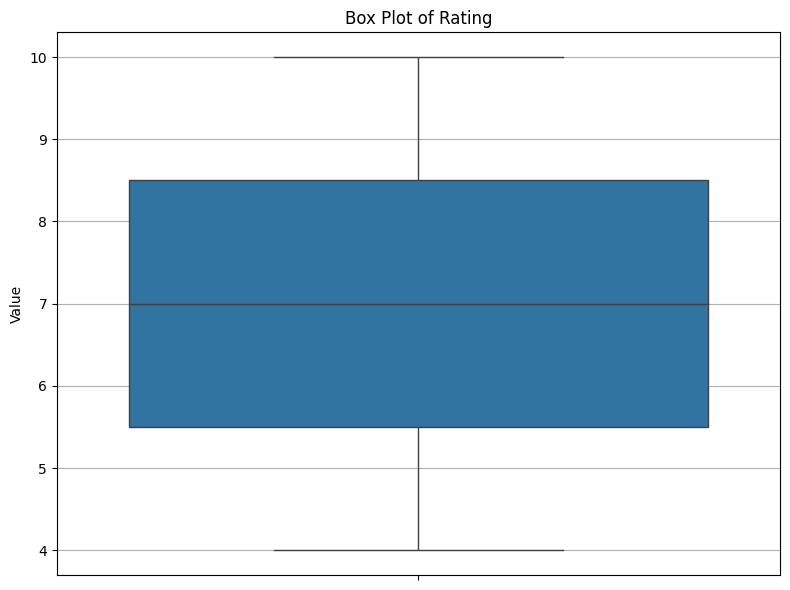

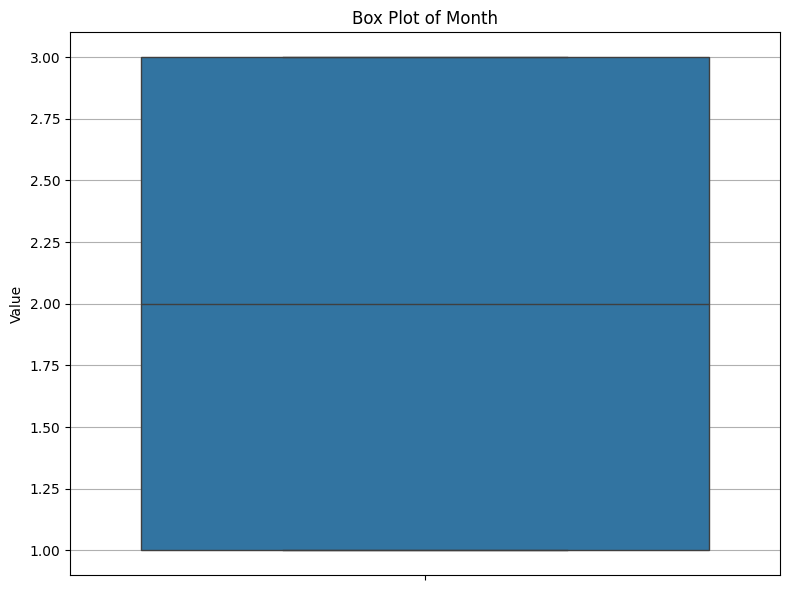

Generated box plots for all numerical columns.


In [ ]:
for column in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=numerical_cols[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

print("Generated box plots for all numerical columns.")

**Sales performance across products was relatively consistent, with no significant outliers detected, reinforcing the highly competitive nature of the market.**

In [ ]:
columns_to_check = ['Unit price', 'Quantity', 'Total']
outliers_data = {}

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    outliers_data[column] = {
        'count': len(outliers),
        'values': outliers.tolist() if not outliers.empty else []
    }

print("Outlier analysis using IQR:")
for column, data in outliers_data.items():
    print(f"Column: {column}")
    print(f"  Number of outliers: {data['count']}")
    if data['count'] > 0:
        print(f"  Outlier values (first 10 if many): {data['values'][:10]}")
    print("\n")

Summary of Key Findings
Sales Performance Overview

Overall Sales Trends: Daily sales showed noticeable fluctuations across the January–March period, with no sustained upward or downward trend, indicating relatively stable overall performance.

Seasonality: January recorded the highest total sales, followed by March, while February experienced the lowest. On a weekly basis, Tuesdays and Saturdays consistently showed stronger sales, whereas Mondays underperformed.

Product & Customer Insights

Product Line Performance:
Food and beverages emerged as the top-performing category overall, followed by Sports and travel and Electronic accessories. Health and beauty generated the lowest total sales.

Customer Type: Sales contributions from Members and Normal customers were almost evenly split, with members contributing marginally higher revenue.

Gender: Female customers generated slightly higher total sales than male customers, although the difference was minimal.

Regional & City-Level Insights

City-wise Sales: Sales were relatively balanced across the three cities, with Naypyitaw recording slightly higher total sales than Yangon and Mandalay.

Regional Sales Patterns: All cities followed similar daily sales fluctuation patterns, suggesting shared external or seasonal drivers.

Top Product Lines by City:

Mandalay: Sports and travel, Health and beauty

Naypyitaw: Food and beverages, Fashion accessories

Yangon: Home and lifestyle, Sports and travel

Average Basket Size: Naypyitaw recorded the highest average basket value ($337.10), followed by Mandalay ($319.87) and Yangon ($312.35).

Payment Behaviour

Payment Methods: Cash was the most used payment method ($112,206.57), closely followed by Ewallet ($109,993.11). Credit cards contributed the lowest sales ($100,767.07), indicating a preference for cash and digital wallets.

Business Insights & Recommendations

Target High-Impact Periods: Leverage peak sales days (Tuesdays and Saturdays) and high-performing months (January) for targeted promotions, optimized staffing, and inventory planning.

Category Optimisation: Continue investing in Food and beverages as a core revenue driver. For Health and beauty, explore targeted marketing, bundling, or product mix optimisation to improve performance.

Regional Strategy: Align product assortment and marketing campaigns with city-specific preferences to maximise regional performance.

Payment Strategy: Promote digital wallet incentives to further shift customers toward faster, more efficient payment methods.

Limitations of the Dataset

High Market Competition:
The dataset reflects a highly competitive environment with minimal variation in sales and product performance. This made it difficult to identify clear market leaders or statistically significant differences between products.

Limited Performance Differentiation:
Sales figures across products and regions were relatively similar, limiting the ability to draw strong conclusions about top-performing items or underperforming segments.

Lack of External Influencing Factors:
The dataset does not include external variables such as promotions, pricing strategies, seasonal demand, or competitor actions, which may significantly impact sales performance.

Short Time Horizon:
The analysis covers a limited time period, reducing the ability to observe long-term trends, seasonality, or shifts in customer behavior.

Aggregation Level:
Data is aggregated at product and regional levels, which may mask individual customer preferences and micro-level sales patterns.

The dataset spans only three months, which limits trend analysis. Without historical data for the same period in previous years, it is difficult to determine whether observed sales patterns represent meaningful trends or short-term fluctuations.




**Project Conclusion**

This analysis explored retail sales performance across multiple dimensions, including time, product lines, customer demographics, payment methods, and regional trends. The findings indicate that while overall sales remained relatively stable over the three-month period, clear patterns emerged in product preferences, city-level performance, and customer purchasing behaviour.

Food and beverages consistently drove the highest revenue, highlighting its importance as a core category, while variations in top-selling product lines across cities emphasised the value of region-specific strategies. Seasonal and daily trends revealed opportunities to optimise promotions, staffing, and inventory during peak periods such as January, Tuesdays, and Saturdays. Additionally, the dominance of cash and e-wallet payments suggests customer preference for quick and accessible transaction methods.

Overall, this project demonstrates how exploratory data analysis and visualisation can uncover actionable business insights. The approach and findings can support data-driven decision-making in sales optimisation, marketing strategy, and operational planning within a retail environment.


Skills Demonstrated

Data Analysis & Exploration: Conducted exploratory data analysis (EDA) to identify sales trends, patterns, and anomalies across time, regions, and product lines.

Python Programming: Utilised Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn to clean, analyse, and visualise data.

Data Visualisation: Created meaningful visualisations including time-series plots, bar charts, heatmaps, and regional comparisons to support insights.

Business Insight Generation: Translated analytical findings into actionable recommendations related to sales optimisation, marketing strategy, and regional performance.

Statistical Thinking: Applied descriptive statistics to understand distributions, customer behaviour, and average basket size across regions.

Communication & Storytelling: Presented insights in a clear, structured, and business-focused manner suitable for both technical and non-technical stakeholders.


“This project demonstrates my ability to analyse retail sales data end-to-end using Python, uncover key trends across products, customers, and regions, and translate those findings into actionable business recommendations.”
